## `19IT031 Aman Desai`

## Practical - 11 `Unsupervised Learning PCA for improving effectiveness and efficiency of ML task.`

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy.special import logsumexp
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('Boston House Prices.csv')
df.head()

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


## Before applying PCA

In [2]:
df.shape

(506, 3)

In [3]:
df.corr()

,Rooms,Distance,Value
Rooms,1.000000,0.205246,0.695360
Distance,0.205246,1.000000,0.249929
Value,0.695360,0.249929,1.000000


Based on Correlation Table we see that Room is more correlated to Value. 
so for estimation Room is more useful Variable. we put it in X axis

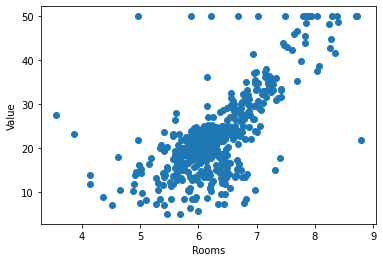

In [4]:
plt.scatter(df.Rooms, df.Value)
plt.xlabel('Rooms')
plt.ylabel('Value')
plt.show()

In [5]:
X = pd.DataFrame(df.Rooms)
Y = df.Value
# Create object of algorithm
rg = linear_model.LinearRegression()
# Create model by fitting data
rg.fit(X, Y)
m=rg.coef_
b=rg.intercept_
print('m:',m,'b:', b)
# RMSE and R2 Score
print("RMSE:", math.sqrt(mean_squared_error(Y,rg.predict(X))), "R2 Score:", r2_score(Y,rg.predict(X)))

m: [9.10210898] b: -34.670620776438554
RMSE: 6.603071389222561 R2 Score: 0.48352545599133423


In Above I can not apply PCA method so first i find correlation between Dependendent variable and Independent Variable then Select the most Correlate independant variable to predict the
House price Here that variable is Room so the problem is that i neglect remaining  independent variables which causes the data lose.

## Applying PCA For dimensionality Reduction

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [7]:
scaled_data=scaler.transform(df)

In [8]:
scaled_data[:5]

array([[ 0.41367189,  0.1402136 ,  0.15968566],
       [ 0.19427445,  0.55715988, -0.10152429],
       [ 1.28271368,  0.55715988,  1.32424667],
       [ 1.01630251,  1.07773662,  1.18275795],
       [ 1.22857665,  1.07773662,  1.48750288]])

In [9]:
from sklearn.decomposition import PCA

In [10]:
# Reduce the Dimensions
pca=PCA(n_components=2)

In [11]:
pca.fit(scaled_data)

PCA(n_components=2)

In [12]:
x_pca=pca.transform(scaled_data)

In [13]:
scaled_data.shape

(506, 3)

In [14]:
x_pca.shape


(506, 2)

In [15]:
scaled_data[0:5]

array([[ 0.41367189,  0.1402136 ,  0.15968566],
       [ 0.19427445,  0.55715988, -0.10152429],
       [ 1.28271368,  0.55715988,  1.32424667],
       [ 1.01630251,  1.07773662,  1.18275795],
       [ 1.22857665,  1.07773662,  1.48750288]])

In [16]:
rg.fit(x_pca, Y)
print("RMSE:", math.sqrt(mean_squared_error(Y,rg.predict(x_pca))), "R2 Score:", r2_score(Y,rg.predict(x_pca)))

RMSE: 3.6135250753097017 R2 Score: 0.8453253716977955


Here we can see that there is improvement on R2 Score and also RMSE reduces after applying PCA dimensionality reduction.

### Conclusion
In this Practical I learned about Dimensionality reduction Method PCA and what is imapct of it if we can not do dimensionality reduction and also see the imapct on accuracy in both the
cases